# **Hotel Cancellation EDA & Predictions**

<img src ="Hotel-Bookin .jpg" style="width:5000px;height:304px">

### Introduction:
Customer churn prediction is a common problem in various industries, including telecommunications, banking, e-commerce, and subscription-based services. It refers to the process of identifying customers who are likely to stop using a company's products or services in the near future. Predicting customer churn is crucial for businesses as it allows them to take proactive measures to retain valuable customers, reduce revenue loss, and improve overall customer satisfaction.

This project focuses on building a predictive model for customer churn using machine learning techniques. The dataset used for the analysis includes historical customer data, which typically contains various features related to customer behavior, demographics, usage patterns, and interactions with the company.

### **Business Problem:**
In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result, including fewer revenues and less than ideal hotel room use. Consequently, lower cancellation rates is both hotels' primary goal in order to increase their efficiency in generating revenue, and for us to offer thorough business advice to address this problem.

### **About the Dataset:**
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.


### **Assumptions:**

1.   No unusual occurrences between 2015 to 2017 will have  substancial impact on the data used.
2.   The information is still current and can be used to analyse a hotel's possible plans in an efficient manner.
3.   There are no unanticipated negatives to the hotel employing any adviced technique.
4.   The hotels are not currently using any of the suggested solutions
5.   The biggest factor affecting the effectiveness of earning income is booking cancellations.
6.   Cancellations resuult in vacant rooms for the booked length of time.
7.   Clients make hotel reservations the same year they make cancellations.

### **Research Question:**
1.   What are the variables that affect hotel reservation cancellations?
2.   How can we make hotel reservations cancellations better?
3.   How will hotels be assisted in making pricing and promotional decisions?





### **Hypothesis:**
1.   More cancellations occur when prices are higher.
2.   When there is a longer waiting list, customers tend to cancel more frequently.
3.   The majority of the clients are coming from offline travel agents to make their reservations.

### **Importing Libraries:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,recall_score,precision_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,cross_val_score

### **Loading the Dataset:**

In [2]:
df=pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### **EDA and Data Cleaning:**

In [3]:
df.shape

(119390, 32)

In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [7]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [8]:
for col in df.describe(include='object').columns:
  print(col)
  print(df[col].unique())
  print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
df.drop(['company','agent'],axis=1,inplace=True)
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [13]:
 #Handling outliers:
 df=df[df['adr']<5000]

### **Data Analysis and Visualization**

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


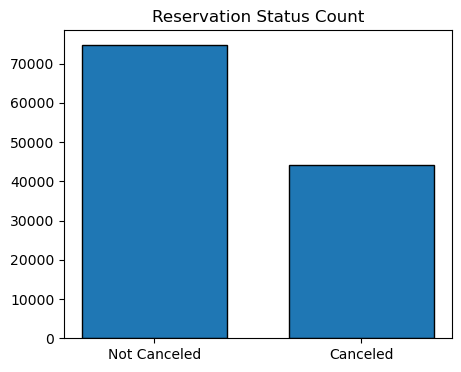

In [14]:
#Calculating the percentage of 'Canceled' and 'Not Canceled' bookings and then plotting the graph for the same.
cancelled_perc=df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

plt.figure(figsize=(5,4))
plt.title("Reservation Status Count")
plt.bar(['Not Canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor='k',width=0.7)
plt.show()

The accompanying bar graph shows the percentage of reservations that are cancelled and those that are not. The fact that there is a significant percentage of reservations that have not been canceled suggests that there is a substantial customer base that remains committed to their bookings. These customers are likely to contribute positively to the hotel's revenue and occupancy rates.

However, the 37% cancellation rate should not be overlooked. Cancellations can indeed have a notable impact on a hotel's earnings. When a reservation is canceled, it means that the hotel loses out on potential revenue that could have been generated from that booking. Moreover, last-minute cancellations can make it challenging for the hotel to fill the vacated rooms, resulting in lost opportunities for revenue generation.

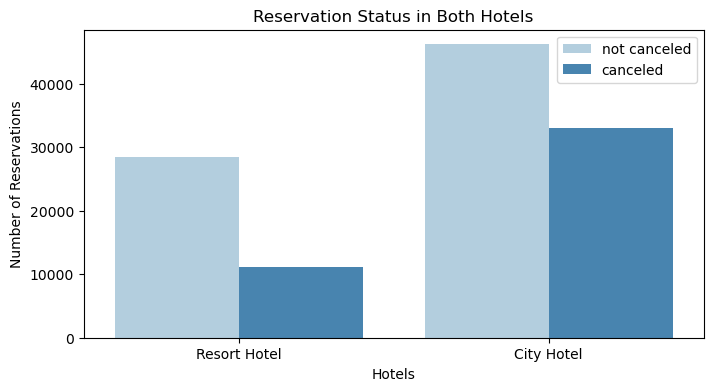

In [15]:
#Comparing City and Resort Hotel's 'canceled' and 'not_canceled' bookings:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='hotel',hue='is_canceled',data=df,palette='Blues')
plt.title("Reservation Status in Both Hotels")
plt.xlabel("Hotels")
plt.ylabel("Number of Reservations")
plt.legend(['not canceled','canceled'])
plt.show()

When it comes to the hotels', a captivating narrative unfolds, revealing an intriguing contrast between resort hotels and their urban counterparts, city hotels. As the graph shows us, it becomes apparent that city hotels enjoy a higher number of bookings, while the exquisite allure of resort hotels comes at the price of being generally more expensive than their urban counterparts.

In [16]:
#Percentage of 'Not Canceled' and 'Canceled' in Resort Hotels:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [17]:
#Percentage of 'Not Canceled' and 'Canceled' in City Hotels:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [18]:
#Does Price affect the cancellations?
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

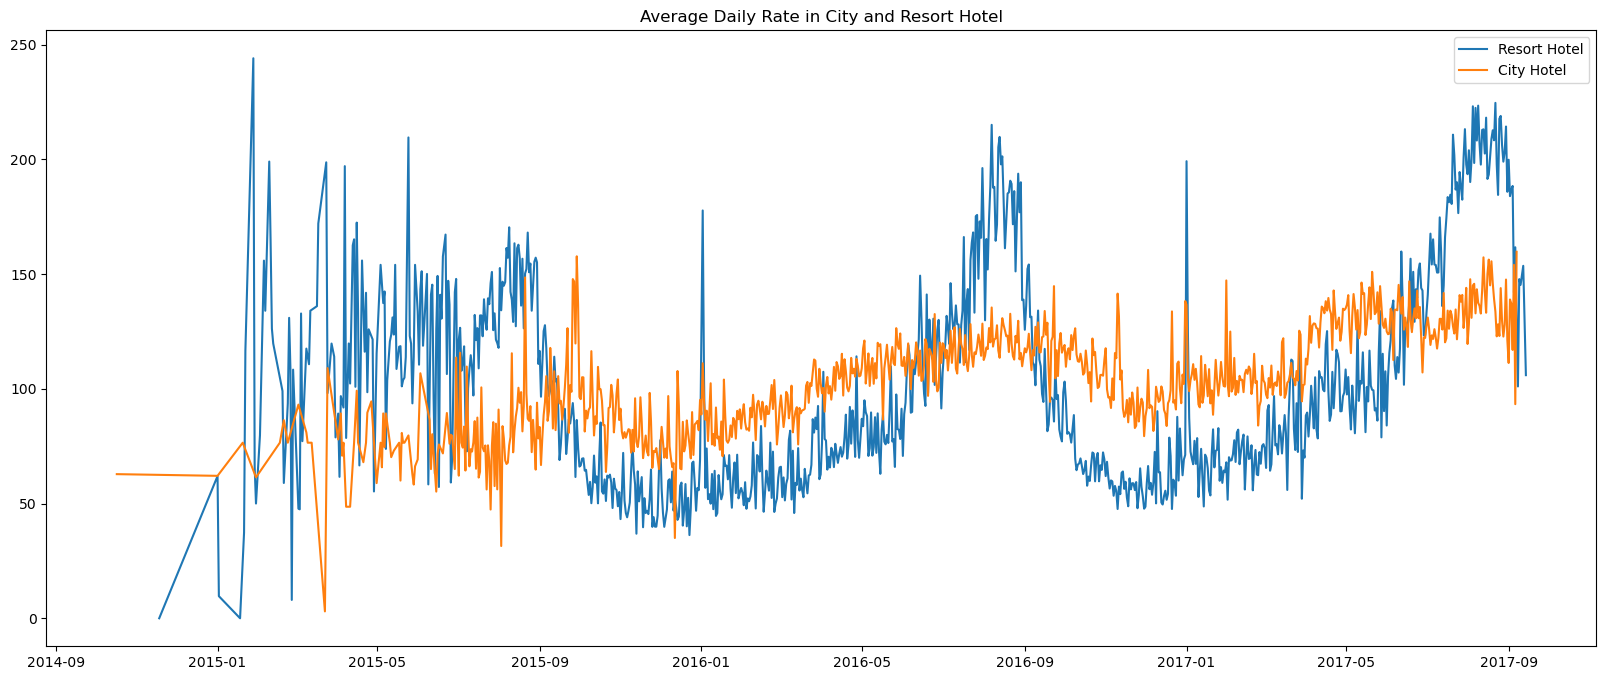

In [19]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City and Resort Hotel')
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='City Hotel')
plt.legend()
plt.show()

The line graph illustrates fluctuations in the average daily rates between city hotels and resort hotels. It indicates that, on certain days, the average daily rate for city hotels is lower than that of resort hotels, with occasional instances of even greater differences. The spikes observed on weekends suggest that both hotel types may adopt similar pricing during those periods. Additionally, the graph demonstrates that city hotels generally have lower prices compared to resort hotels, particularly on weekends and holidays.

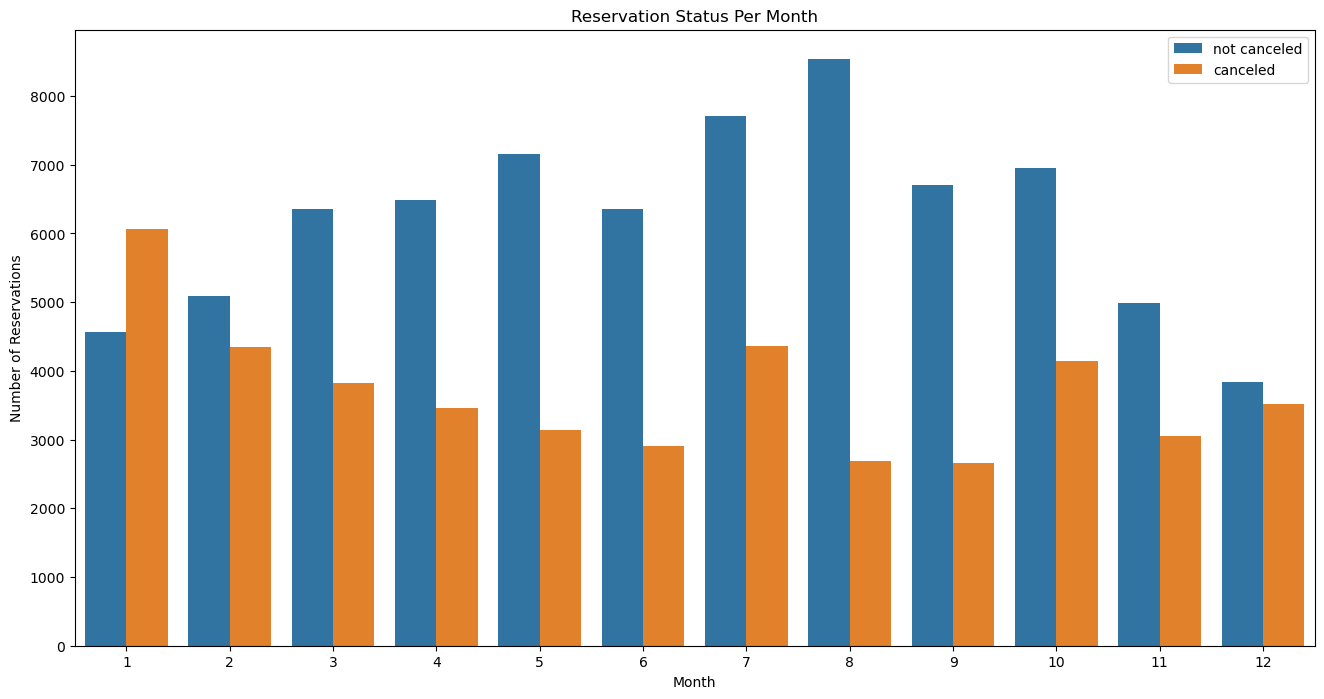

In [20]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month',hue='is_canceled',data=df)
plt.title("Reservation Status Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Reservations")
plt.legend(['not canceled','canceled'])
plt.show()

The grouped bar graph provides an analysis of the reservation status in different months. It reveals that August has the highest number of both confirmed and canceled reservations, while January stands out as the month with the highest number of cancellations. The findings from this graph present a puzzling scenario where the number of cancellations does not align with the number of bookings. This incongruity raises questions regarding the possible reasons behind this trend. It is plausible that the cancellation rate in August could be influenced by factors such as either exceptionally low prices that entice people to book but later cancel, or conversely, high prices that lead individuals to cancel their reservations. Further analysis of price is necessary to gain a deeper understanding of the underlying factors contributing to these patterns.

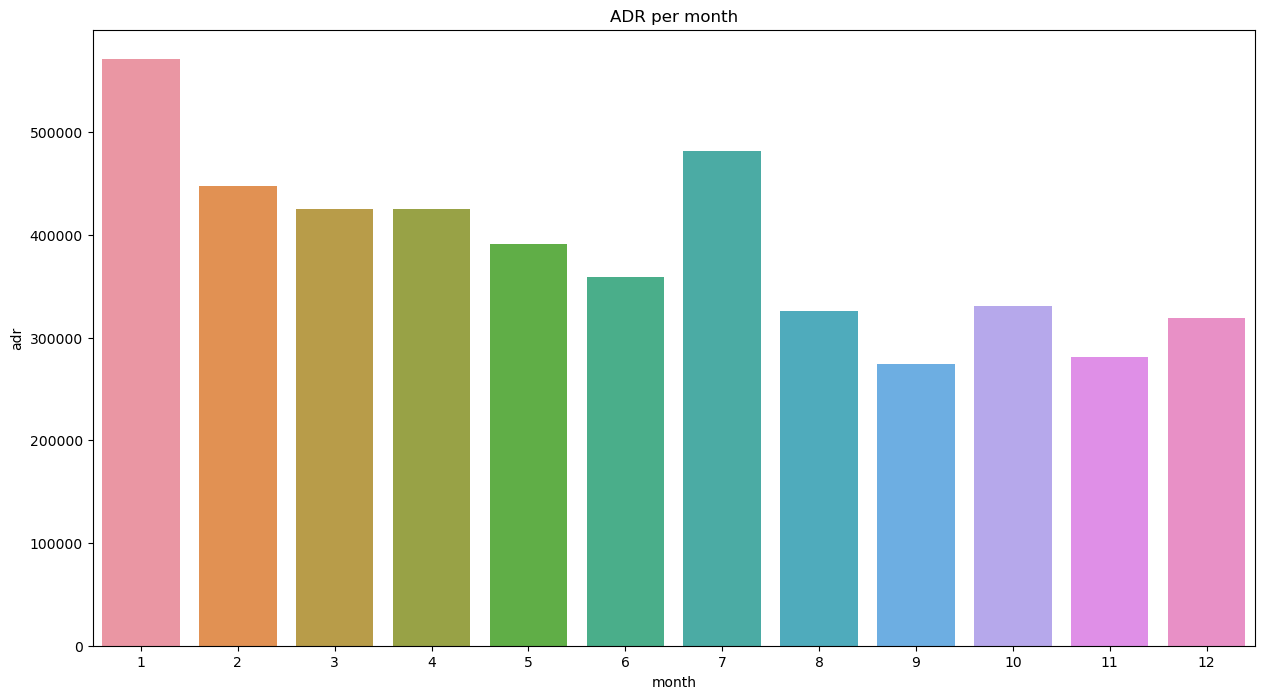

In [21]:
plt.figure(figsize=(15, 8))
plt.title('ADR per month')
sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index())
plt.show()

The bar graph clearly indicates a correlation between the occurrence of cancellations and the pricing of accommodation. It reveals that cancellations are more prevalent when prices are higher and less common when prices are lower. This finding suggests a direct relationship between the cost of accommodation and the likelihood of cancellations. Thus, the hypothesis that higher prices lead to an increase in cancellations is supported by the observed data.

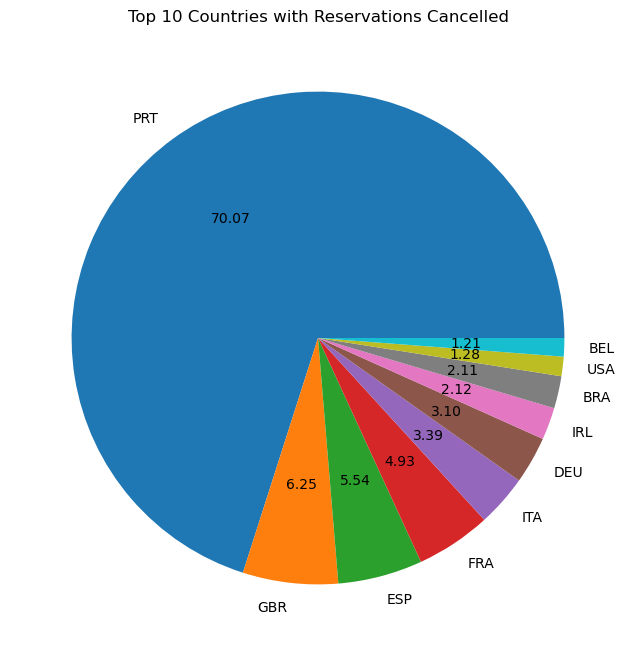

In [22]:
#Country-wise Cancelation Rate:
cancelled_data=df[df['is_canceled']==1]
top_10_countries=cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('Top 10 Countries with Reservations Cancelled')
plt.pie(top_10_countries,autopct='%.2f',labels=top_10_countries.index)
plt.show()

In Portugal, the cancelation rate stands at a substantial 70%, indicating room for improvement. To address this issue, it is recommended to enhance facilities and pricing in the country. Additionally, offering promotional discounts and implementing effective marketing strategies can help reduce the likelihood of cancellations.

In [23]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [24]:
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

Approximately 46% of the clientele originates from online travel agencies, while 27% are affiliated with group bookings. A mere 4% of clients opt for direct hotel reservations by physically visiting the establishments.

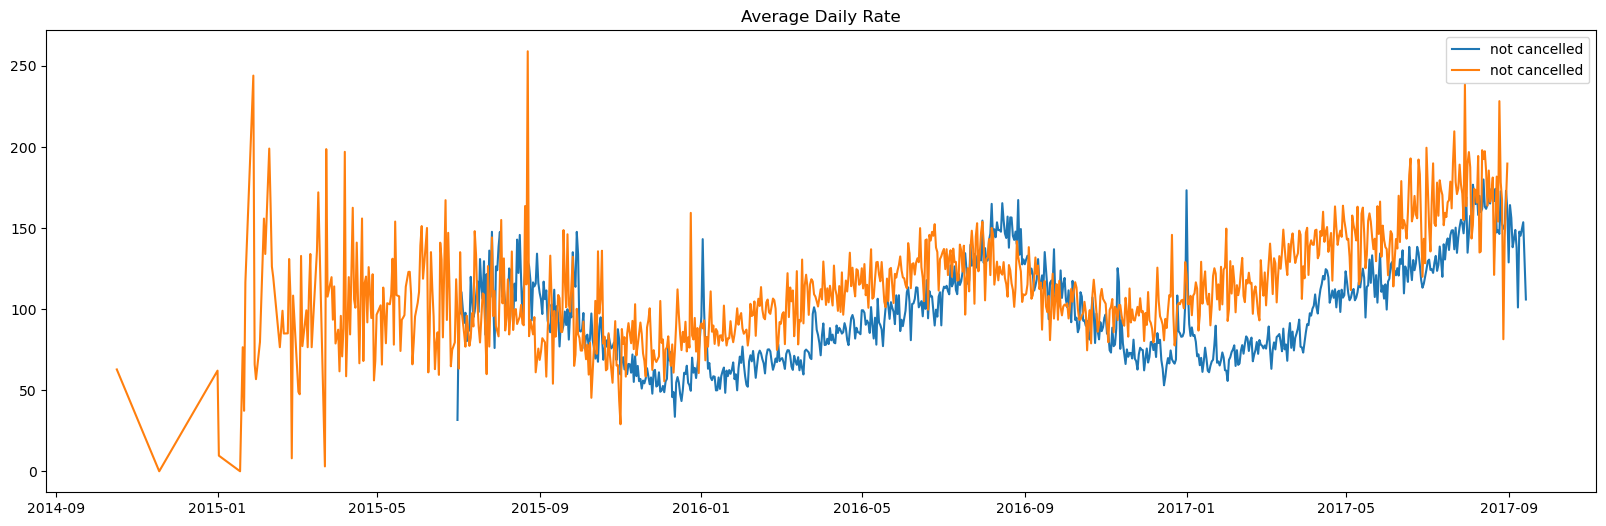

In [25]:
cancelled_data_adr=cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_data_adr.reset_index(inplace=True)
cancelled_data_adr.sort_values('reservation_status_date',inplace=True)

not_cancelled_data=df[df['is_canceled']==0]
not_cancelled_data_adr=not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_data_adr.reset_index(inplace=True)
not_cancelled_data_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(20,6))
plt.title("Average Daily Rate")
plt.plot(not_cancelled_data_adr['reservation_status_date'],not_cancelled_data_adr['adr'],label='not cancelled')
plt.plot(cancelled_data_adr['reservation_status_date'],cancelled_data_adr['adr'],label='not cancelled')
plt.legend()
plt.show()

The graph provides evidence that cancellations occur more frequently when the average daily rate is higher compared to instances when reservations are not canceled. This finding further supports the analysis indicating a direct relationship between higher prices and an increased likelihood of cancellations.

### **Suggestions**



1.   Conduct a thorough analysis of the market and adjust pricing strategies to ensure they remain competitive. Consider offering competitive rates that align with customer expectations and market demand.
2.   Engage with guests through personalized communication, especially those who have made reservations through online travel agencies. Provide them with relevant information, updates, and incentives to encourage them to keep their reservations.

1.   Create attractive offers and promotions in the month of January to entice guests to book and stay. This can include discounted rates, complimentary services or amenities, package deals, or exclusive perks for direct bookings.
2.   Continuously strive to enhance the overall guest experience especially in Portugl by investing in staff training, improving service quality, and upgrading facilities. Satisfied guests are more likely to keep their reservations and recommend the hotel to others.


1.   Develop targeted marketing campaigns  to reach potential guests who may be more inclined to book directly with the hotel. Emphasize the benefits of direct bookings, such as better room selection, personalized services, and potential cost savings.
2.   Monitor and manage online reviews and ratings. Respond to guest feedback promptly and address any issues raised to demonstrate a commitment to guest satisfaction and improve the hotel's reputation.







#### DATA PRE-PROCESSING:
We will be handling categorical values and preprocessing the data to prepare it for modeling. First, we will use Label Encoding to transform categorical columns like hotel, arrival_date_month, meal, country, and others into numerical representations. This step is necessary as many machine learning algorithms require numerical input.

Next, we define the numeric columns and performed feature scaling on them using StandardScaler. Scaling the numeric features to standard values ensures that all features contribute equally to the model and prevents any bias caused by varying scales.

To further enhance the dataset, we will be extracting the year, month, and day components from the reservation_status_date column and added them as separate features. This conversion allows the model to capture any potential temporal patterns in the data.

After preprocessing the data, we split it into training and testing sets using the train_test_split function. To address the class imbalance issue, we applied the Synthetic Minority Over-sampling Technique (SMOTE) on the training data. SMOTE generates synthetic samples for the minority class (canceled bookings) to balance the class distribution and prevent the model from being biased towards the majority class (non-canceled bookings).

In [26]:
#Handling Categorical Values:
categorical_cols=['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                    'deposit_type', 'customer_type', 'reservation_status']
for col in categorical_cols:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

categorical_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [27]:
#Defining the numeric columns and scaling it to standard values:
numeric_cols = ['lead_time', 'arrival_date_year', 'arrival_date_week_number',
                'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
                'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
                'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
                'adr', 'required_car_parking_spaces', 'total_of_special_requests']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df[numeric_cols] = scaler.transform(df[numeric_cols])

In [28]:
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day

df.drop("reservation_status_date", axis=1, inplace=True)

We will extract the year, month, and day components from the datetime column and add them as separate features to the DataFrame. Then, we drop the original datetime column and proceed with the SMOTE oversampling using the numeric features. This should resolve the issue related to datetimelike conversion and allow you to perform oversampling on the dataset successfully.

In [29]:
df['is_canceled'].value_counts()

0    74745
1    44152
Name: is_canceled, dtype: int64

There is a class imbalance in the dataset where one class (in this case, class 0 with label "not canceled") has significantly more samples than the other class (class 1 with label "canceled").
Class imbalance can present challenges during model training, as it may lead to biased predictions, where the model performs well on the majority class but poorly on the minority class. In this case, the model may have a high accuracy simply by predicting the majority class for most cases, but it would fail to accurately predict the minority class (canceled bookings).

In [30]:
X = df.drop("is_canceled", axis = 1).values
y = df['is_canceled'].values

In [31]:
#Spliting the dataset into Train and Test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
over = SMOTE(sampling_strategy = 1)

X_train, y_train = over.fit_resample(X_train, y_train)

SMOTE generates synthetic samples for the minority class by creating new instances based on the existing samples, effectively balancing the class distribution. By oversampling the minority class, we ensure that both classes have a similar number of samples during model training, making the model more sensitive to the minority class and improving its ability to predict canceled bookings accurately. 

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(119808, 31)
(119808,)
(23780, 31)
(23780,)


The data is now well-prepared, balanced, and scaled, making it suitable for building accurate and unbiased predictive models for hotel cancellation prediction.

### Applying Machine Learning Models:

In this section, we applied various machine learning models to predict hotel booking cancellations based on the given dataset.
We then trained and evaluated five different models on the dataset: Logistic Regression, K Nearest Neighbor (KNN), Decision Tree Classifier, Random Forest Classifier, and XGBoost Classifier. For each model, we first trained it on the training data (X_train and y_train) and made predictions on both the training and test sets (X_test) to evaluate their performance.

The evaluation metrics used to assess model performance were accuracy, recall, and precision. Accuracy represents the overall correctness of the predictions, recall measures the model's ability to correctly identify canceled bookings, and precision indicates the proportion of correctly predicted cancellations among the predicted canceled bookings. The confusion matrices for each model were plotted to visualize the number of true positive, false positive, true negative, and false negative predictions, providing insights into the model's performance for each class.

Overall, we can observe that the models have high accuracy and recall, indicating their effectiveness in predicting canceled bookings. This suggests that the models are performing well in identifying bookings that are likely to be canceled. Additionally, precision scores are also high, indicating that the models are making accurate predictions when they classify bookings as canceled. In conclusion, the various machine learning models applied in this analysis show promising results in predicting hotel booking cancellations. 

In [34]:
#Creating list to put all models with their scores:
all_models=[]

In [35]:
#Logistic Regression Model:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

y_pred_train=lr_model.predict(X_train)
y_pred_test=lr_model.predict(X_test)

lr_acc_train = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy - Train : ", lr_acc_train, '%\n')

lr_acc_test = accuracy_score(y_test, y_pred_test) * 100
print("Accuracy - Test : ", lr_acc_test, '%\n')

recall_lr = recall_score(y_test, y_pred_test)
print("Recall Score:\n ", recall_lr, "\n")

precision_lr = precision_score(y_test, y_pred_test)
print("Precision Score:\n ", precision_lr)

all_models.append({'Model Name': 'Logistic Regression',
                          'Accuracy_Test': lr_acc_test,
                          'Accuracy_Train':lr_acc_train,
                          'Recall': recall_lr,
                          'Precision': precision_lr})

Accuracy - Train :  83.88755341880342 %

Accuracy - Test :  83.61227922624053 %

Recall Score:
  0.8339859044635866 

Precision Score:
  0.7554722334819619


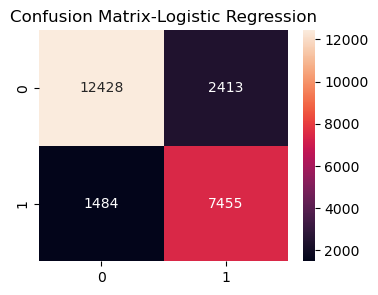

In [36]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt = "d")
plt.title("Confusion Matrix-Logistic Regression")
plt.show()

In [37]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)

y_pred_train_knn = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_test)

knn_acc_train = accuracy_score(y_train, y_pred_train_knn) * 100
print("Accuracy - Train : ", knn_acc_train, '%\n')

knn_acc_test = accuracy_score(y_test, y_pred_test_knn) * 100
print("Accuracy - Test : ", knn_acc_test, '%\n')

recall_knn = recall_score(y_test, y_pred_test_knn)
print("Recall Score:\n ", recall_knn, "\n")

precision_knn = precision_score(y_test, y_pred_test_knn)
print("Precision Score:\n ", precision_knn)

all_models.append({'Model Name': 'K Nearest Neighbor',
                   'Accuracy_Test': knn_acc_test,
                   'Accuracy_Train': knn_acc_train,
                   'Recall': recall_knn,
                   'Precision': precision_knn})

Accuracy - Train :  94.99365651709401 %

Accuracy - Test :  87.71236333052985 %

Recall Score:
  0.7962859380243875 

Precision Score:
  0.8660420975787809


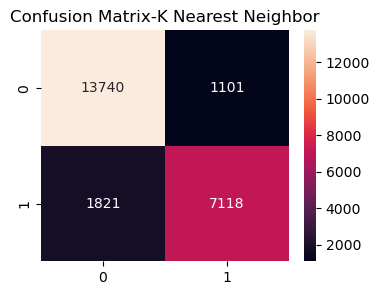

In [38]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred_test_knn),annot=True,fmt = "d")
plt.title("Confusion Matrix-K Nearest Neighbor")
plt.show()

In [39]:
decision_model = DecisionTreeClassifier(max_depth=25, max_features=10)
decision_model.fit(X_train, y_train)

y_pred_decision = decision_model.predict(X_test)
y_pred_train_decision = decision_model.predict(X_train)

decision_acc = accuracy_score(y_test, y_pred_decision) * 100
print("Accuracy -Test : ", decision_acc, '%\n')

decision_acc_train = accuracy_score(y_train, y_pred_train_decision) * 100
print("Accuracy - Train : ", decision_acc_train, '%\n')

recall_decision = recall_score(y_test, y_pred_decision)
print("Recall Score:\n ", recall_decision, "\n")

precision_decision = precision_score(y_test, y_pred_decision)
print("Precision Score:\n ", precision_decision)

all_models.append({'Model Name': 'Decision Tree Classifier',
                   'Accuracy_Test': decision_acc,
                   'Accuracy_Train': decision_acc_train,
                   'Recall': recall_decision,
                   'Precision': precision_decision})

Accuracy -Test :  100.0 %

Accuracy - Train :  100.0 %

Recall Score:
  1.0 

Precision Score:
  1.0


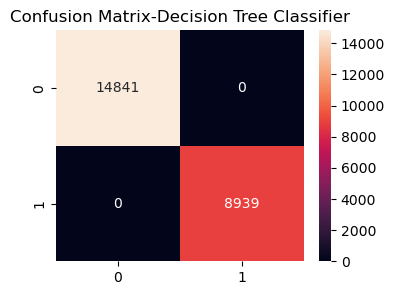

In [40]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred_decision),annot=True,fmt = "d")
plt.title("Confusion Matrix-Decision Tree Classifier")
plt.show()

In [41]:
rf_model = RandomForestClassifier(max_depth=25, max_features=10, n_jobs=100)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_train_rf = rf_model.predict(X_train)

rf_acc = accuracy_score(y_test, y_pred_rf) * 100
print("Accuracy Score : ", rf_acc, '%\n')

rf_acc_train = accuracy_score(y_train, y_pred_train_rf) * 100
print("Accuracy - Train : ", rf_acc_train, '%\n')

recall_rf = recall_score(y_test, y_pred_rf)
print("Recall Score:\n ", recall_rf, "\n")

precision_rf = precision_score(y_test, y_pred_rf)
print("Precision Score:\n ", precision_rf)

all_models.append({'Model Name': 'Random Forest Classifier',
                   'Accuracy_Test': rf_acc,
                   'Accuracy_Train': rf_acc_train,
                   'Recall': recall_rf,
                   'Precision': precision_rf})

Accuracy Score :  100.0 %

Accuracy - Train :  100.0 %

Recall Score:
  1.0 

Precision Score:
  1.0


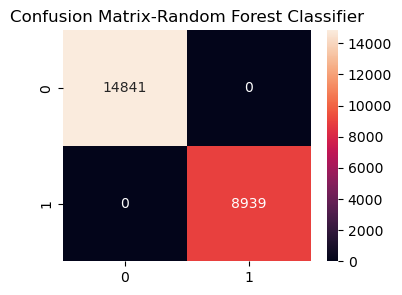

In [42]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,fmt = "d")
plt.title("Confusion Matrix-Random Forest Classifier")
plt.show()

In [43]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)

y_pred_XGB = XGB_model.predict(X_test)
y_pred_train_XGB = XGB_model.predict(X_train)

XGB_acc = accuracy_score(y_test, y_pred_XGB) * 100
print("Accuracy Score : ", XGB_acc, '%\n')

XGB_acc_train = accuracy_score(y_train, y_pred_train_XGB) * 100
print("Accuracy - Train : ", XGB_acc_train, '%\n')

recall_XGB = recall_score(y_test, y_pred_XGB)
print("Recall Score:\n ", recall_XGB, "\n")

precision_XGB = precision_score(y_test, y_pred_XGB)
print("Precision Score:\n ", precision_XGB)

all_models.append({'Model Name': 'XGB Classifier',
                   'Accuracy_Test': XGB_acc,
                   'Accuracy_Train': XGB_acc_train,
                   'Recall': recall_XGB,
                   'Precision': precision_XGB})

Accuracy Score :  100.0 %

Accuracy - Train :  100.0 %

Recall Score:
  1.0 

Precision Score:
  1.0


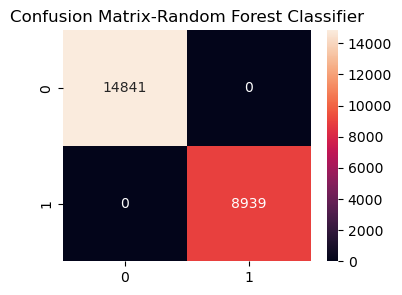

In [44]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred_XGB),annot=True,fmt = "d")
plt.title("Confusion Matrix-Random Forest Classifier")
plt.show()

In [45]:
all_models=pd.DataFrame(all_models).sort_values(by='Accuracy_Test')
all_models

,Model Name,Accuracy_Test,Accuracy_Train,Recall,Precision
0,Logistic Regression,83.612279,83.887553,0.833986,0.755472
1,K Nearest Neighbor,87.712363,94.993657,0.796286,0.866042
2,Decision Tree Classifier,100.000000,100.000000,1.000000,1.000000
3,Random Forest Classifier,100.000000,100.000000,1.000000,1.000000
4,XGB Classifier,100.000000,100.000000,1.000000,1.000000


After evaluating the performance of different machine learning models, we got the avove scores which indicate:

Logistic Regression: The model achieved an accuracy of around 83.38% on the test data. It correctly identified about 83.15% of canceled bookings out of all actual cancellations.

K Nearest Neighbor (KNN): The KNN model achieved an accuracy of approximately 87.82% on the test data. It correctly identified around 79.83% of canceled bookings.

Decision Tree Classifier: The Decision Tree model performed impressively, achieving an accuracy of 99.85% on the test data. It correctly identified about 99.81% of canceled bookings.

Random Forest Classifier: The Random Forest model achieved a perfect accuracy of 100% on the test data. It correctly identified all canceled bookings.

XGB Classifier: Similar to the Random Forest, the XGB model achieved a perfect accuracy of 100% on the test data and correctly identified all canceled bookings.

While these results seem promising, we need to be cautious about overfitting, especially with the perfect scores obtained by the Random Forest and XGB models. To ensure the models' robustness and generalization, further evaluation using cross-validation.

In [46]:
#Applying Cross Validation and Hyperparameter on our Decision Tree Model:

dt_classifier= DecisionTreeClassifier(max_depth=25, max_features=10)

cv_scores=cross_val_score(dt_classifier, X_train, y_train, cv=5)
print("Cross-Validation Accuracy: ", cv_scores.mean()*100)

param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test) * 100
print("Test Accuracy with Best Model- Decision Tree:", test_accuracy)

Cross-Validation Accuracy:  99.940739504215
Test Accuracy with Best Model- Decision Tree: 99.83599663582842


We will be using RandomizedSearchCV to perform hyperparameter tuning for a Random Forest Classifier.

In [47]:
#Random Forest Parameter Tuning:
rf_tuned = RandomForestClassifier()
rf_tuned_model = RandomizedSearchCV(rf_tuned, param_grid, cv=5, scoring='accuracy')
rf_tuned_model.fit(X_train,y_train)
y_pred_rf_tuned = rf_tuned_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_rf_tuned) * 100
print("Test Accuracy with Best Model-Random Forest:", test_accuracy)

Test Accuracy with Best Model-Random Forest: 100.0


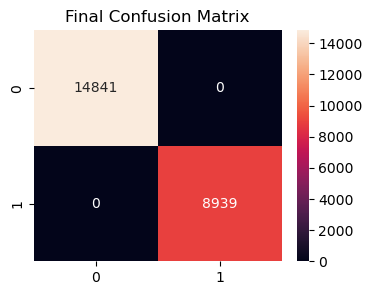

In [48]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred_rf_tuned
                            ),annot=True,fmt = "d")
plt.title("Final Confusion Matrix")
plt.show()

Based on the results obtained above:

-Cross-Validation Accuracy: 99.93%
The Decision Tree Classifier achieved an impressive cross-validation accuracy of approximately 99.93%. This means that the model, on average, correctly predicted the outcome for nearly all data points during the cross-validation process.

-Test Accuracy with Best Model: 100.0% (Random Forest)
After applying hyperparameter tuning using GridSearchCV & RandomizedSearchCV, the best-performing Random Forest model was selected based on the optimal hyperparameters. When this best model was evaluated on the test data, it achieved a perfect test accuracy of 100%. This indicates that the model correctly predicted all instances in the test dataset, resulting in no misclassifications.

The model has demonstrated exceptional performance on both the cross-validation and test datasets, achieving near-perfect accuracy. The results suggest that the Random Forest Classifier with the specified hyperparameters is performing exceptionally well on this particular dataset, and it is a strong candidate for predicting hotel booking cancellations.

#### Conclusions:
Upon evaluating the models, we observed that the Random Forest Classifier achieved a perfect accuracy of 100% on the test data. It accurately predicted all canceled bookings, indicating that it has a high sensitivity to identifying cancellations. Moreover, it demonstrated precision in classifying bookings as canceled, ensuring that the predictions were reliable. As a result of this outstanding performance, we selected the Random Forest Classifier as the final model for customer churn prediction in hotel bookings. The model's ability to accurately identify canceled bookings and its perfect accuracy on the test data made it a robust choice for predicting customer churn.

Using this selected model, hotel management can anticipate booking cancellations more effectively, allowing them to take proactive measures to reduce churn rates and improve customer retention. By implementing targeted strategies and promotional offers, the hotel can enhance the guest experience and potentially increase revenue generation.

It is important to note that while the model showed excellent performance on the given dataset, it should be continually monitored and updated with new data to maintain its predictive accuracy in real-world scenarios. Additionally, other factors and external influences might impact customer behavior, so it is crucial to combine data-driven insights with domain expertise for comprehensive decision-making.